# 重回帰分析（準備）

## データの読み込みと可視化

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# x：説明変数全体
x = df[['density', 'volatile acidity']]
# y：目的変数（アルコール度数）
y = df[['alcohol']]
# x1：説明変数（密度：density）
x1 = df[['density']]
# x2：説明変数（揮発酸：volatile acidity）
x2 = df[['volatile acidity']]

print(x.shape)
print(y.shape)

(1599, 2)
(1599, 1)


In [4]:
from mpl_toolkits.mplot3d import Axes3D # 3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

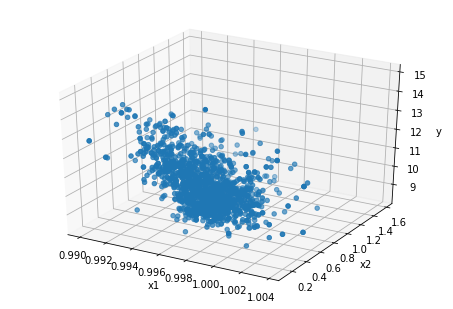

In [5]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()

## 標準化（scikit-learnのStandardScalerを使う方法）

scikit-learnのデフォルトで計算される分散は一般的な分散。

In [6]:
from sklearn import preprocessing

In [7]:
# 標準化クラスのインスタンス化
sscaler = preprocessing.StandardScaler() 

'''
# 平均や標準偏差などのパラメータ計算
sscaler.fit(x)
sscaler.fit(y)

# 上で求めたパラメータをもとにデータ計算
xss_sk = sscaler.transform(x) 
yss_sk = sscaler.transform(y)
'''
# 上の方法でやるとなぜかうまくいかない
# 1変数ごとにパラメータ計算、データ変換を並べて実行しないとできない?
# パラメータ計算とデータ変換をまとめて実行
xss_sk = sscaler.fit_transform(x)
yss_sk = sscaler.fit_transform(y)

print(xss_sk)
print(yss_sk)

[[ 0.55827446  0.96187667]
 [ 0.02826077  1.96744245]
 [ 0.13426351  1.29706527]
 ...
 [-0.53355375 -0.09955388]
 [-0.67665745  0.65462046]
 [-0.66605717 -1.21684919]]
[[-0.96024611]
 [-0.58477711]
 [-0.58477711]
 ...
 [ 0.54162988]
 [-0.20930812]
 [ 0.54162988]]


## 標準化（pandasを使う方法）

pandasのデフォルトで計算される分散は不偏分散

In [8]:
# std()は標準偏差を計算するメソッド
xss_pd = (x - x.mean()) / x.std()
yss_pd = (y - y.mean()) / y.std()

print(xss_pd.head())
print(yss_pd.head())

    density  volatile acidity
0  0.558100          0.961576
1  0.028252          1.966827
2  0.134222          1.296660
3  0.664069         -1.384011
4  0.558100          0.961576
    alcohol
0 -0.959946
1 -0.584594
2 -0.584594
3 -0.584594
4 -0.959946


普通の分散を用いる方法

In [9]:
# ddof=0を設定することで普通の分散となる
# デフォルトではddof=1となっており、このときは不偏分散
xss_pd = (x - x.mean()) / x.std(ddof=0)
yss_pd = (y - y.mean()) / y.std(ddof=0)

print(xss_pd.head())
print(yss_pd.head())

    density  volatile acidity
0  0.558274          0.961877
1  0.028261          1.967442
2  0.134264          1.297065
3  0.664277         -1.384443
4  0.558274          0.961877
    alcohol
0 -0.960246
1 -0.584777
2 -0.584777
3 -0.584777
4 -0.960246


## 標準化（Numpyを使う方法）

Numpyのデフォルトは普通の分散

In [10]:
import numpy as np

lambdaは無名関数であり、フォーマットは`lambda x: y`  
xが引数で、yは戻り値となる

In [11]:
# 元の値がPandasのDataFrameなのでそのまま関数に値を使えない
# apply関数によって関数に値を適用させる
x_np = x.apply(lambda x: (x - np.mean(x)) / np.std(x))
y_np = y.apply(lambda y: (y - np.mean(y)) / np.std(y))

print(x_np.head())
print(y_np.head())

    density  volatile acidity
0  0.558274          0.961877
1  0.028261          1.967442
2  0.134264          1.297065
3  0.664277         -1.384443
4  0.558274          0.961877
    alcohol
0 -0.960246
1 -0.584777
2 -0.584777
3 -0.584777
4 -0.960246


pandasと同様にddofオプションを使うことにより、不偏分散も求めることができる。  
Numpyの場合は、`ddof=1`とする。

In [12]:
x_np = x.apply(lambda x: (x - np.mean(x)) / np.std(x, ddof=1))
y_np = y.apply(lambda y: (y - np.mean(y)) / np.std(y, ddof=1))

print(x_np.head())
print(y_np.head())

    density  volatile acidity
0  0.558100          0.961576
1  0.028252          1.966827
2  0.134222          1.296660
3  0.664069         -1.384011
4  0.558100          0.961576
    alcohol
0 -0.959946
1 -0.584594
2 -0.584594
3 -0.584594
4 -0.959946


## min-maxスケーリング

最大値が1、最小値が0となるように正規化を行う。

### scikit-learnを使う場合

(yについてはできているけど、xについてはできていない...)  
→ x,yでパラメータ計算、データ変換を並べて書く必要がある  
　（全部パラメータ計算してから、まとめてデータ変換はできない）

In [15]:
mscaler = preprocessing.MinMaxScaler()

mscaler.fit(x)
xms = mscaler.transform(x)

mscaler.fit(y)
yms = mscaler.transform(y)

print(xms)
print(yms)

[[0.56754772 0.39726027]
 [0.49412628 0.52054795]
 [0.50881057 0.43835616]
 ...
 [0.41629956 0.26712329]
 [0.39647577 0.35958904]
 [0.3979442  0.13013699]]
[[0.15384615]
 [0.21538462]
 [0.21538462]
 ...
 [0.4       ]
 [0.27692308]
 [0.4       ]]


### Numpyを使う場合

In [14]:
x_ms = x.apply(lambda x: (x - np.min(x)) / ((np.max(x)) - np.min(x)))
y_ms = y.apply(lambda y: (y - np.min(y)) / ((np.max(y)) - np.min(y)))

print(x_ms.head())
print(y_ms.head())

    density  volatile acidity
0  0.567548          0.397260
1  0.494126          0.520548
2  0.508811          0.438356
3  0.582232          0.109589
4  0.567548          0.397260
    alcohol
0  0.153846
1  0.215385
2  0.215385
3  0.215385
4  0.153846
